In [2]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from langdetect import detect
import numpy as np
import matplotlib.pyplot as plt
from pandarallel import pandarallel
from textblob import TextBlob


def detect_lang(text):
    """
    Detects the language of a story.

    Parameters
    ----------
    text : str
        The story to be processed.
    Returns
    -------
    lang : str
        The language of the story.
    """
    try:
        return detect(text)
    except:
        return 'unknown'
    
def correct_sentence(text):
    """
    Corrects the spelling of a sentence.

    Parameters
    ----------
    text : str
        The sentence to be processed.
    Returns
    -------
    text : str
        The corrected processed sentence.
    """
    return str(TextBlob(text).correct())

def preprocess(text):
    """
    Preprocesses a story into sentences. Corrects the spelling of each sentence.

    Parameters
    ----------
    text : str
        The story to be processed.
    Returns
    -------
    text : str
        The processed story.
    """
    sent_tokenize_list = np.array(sent_tokenize(text))
    sent_tokenize_list = np.vectorize(correct_sentence)(sent_tokenize_list)
    return sent_tokenize_list

def preprocess_without_ac(text):
    """
    Preprocesses a story into sentences.

    Parameters
    ----------
    text : str
        The story to be processed.
    Returns
    -------
    text : str
        The processed story.
    """
    sent_tokenize_list = np.array(sent_tokenize(text))
    return sent_tokenize_list


In [3]:
# Data import
df_ac = pd.read_csv('data/sentiment_analysis.csv')
df = pd.read_csv('data/sentiment_analysis_no_autocorrect.csv')


In [5]:
df_ac

,sentence,negativity,neutrality,positivity,compound
0,I accepted a friend request on Facebook becaus...,0.000,0.452,0.548,0.8176
1,He chatted on Facebook Messenger and did some ...,0.000,1.000,0.000,0.0000
2,He then decided to continue the conversation o...,0.000,1.000,0.000,0.0000
3,"His ""friend"" attempted to develop a close rela...",0.000,1.000,0.000,0.0000
4,"After some time, they asked me to help them wi...",0.000,0.838,0.162,0.4019
...,...,...,...,...,...
29013,To matter who they say they are or that they h...,0.000,0.748,0.252,0.6597
29014,The old saying goes: -Now can you tell a summe...,0.254,0.746,0.000,-0.5267
29015,Their lips move... By investigation is complet...,0.000,0.856,0.144,0.4939
29016,of AWARE!,0.000,1.000,0.000,0.0000


In [6]:
df

,sentence,negativity,neutrality,positivity,compound
0,I accepted a friend request on Facebook becaus...,0.000,0.452,0.548,0.8176
1,We chatted on Facebook Messenger and did some ...,0.000,1.000,0.000,0.0000
2,We then decided to continue the conversation o...,0.000,1.000,0.000,0.0000
3,"This ""friend"" attempted to develop a close rel...",0.000,1.000,0.000,0.0000
4,"After some time, they asked me to help them wi...",0.000,0.838,0.162,0.4019
...,...,...,...,...,...
29091,No matter who they say they are or that they h...,0.083,0.677,0.241,0.4939
29092,The old saying goes: -How can you tell a scamm...,0.254,0.746,0.000,-0.5267
29093,Their lips move... My investigation is complet...,0.000,0.856,0.144,0.4939
29094,BE AWARE!,0.000,1.000,0.000,0.0000


In [ ]:
# colorblind friendly colors
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

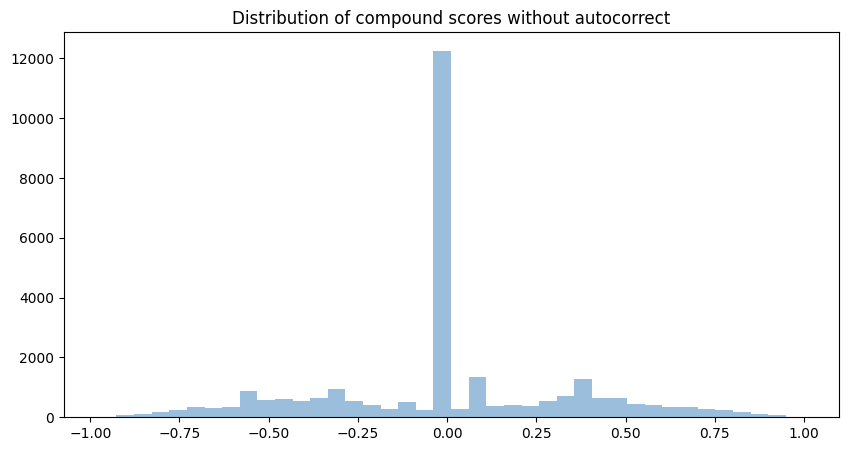

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(df['compound'], bins=40, color=colors[0], alpha=0.5, label='compund score')
plt.title('Distribution of compound scores without autocorrect')
plt.show()

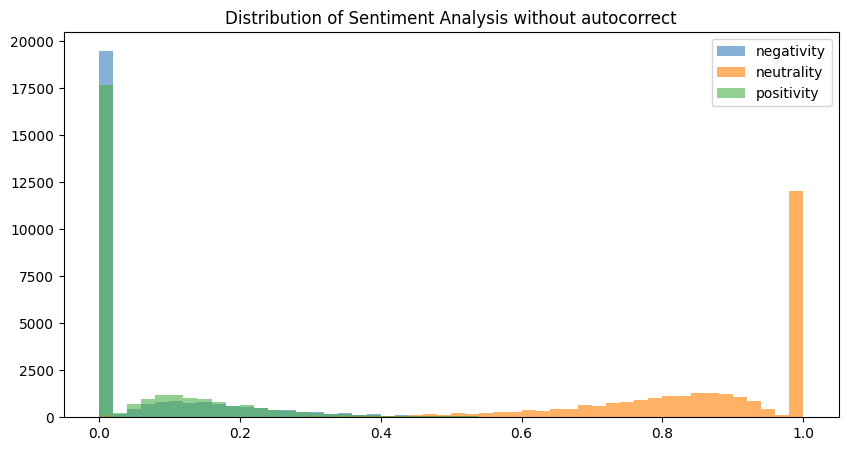

In [8]:
plt.figure(figsize=(10, 5))
plt.hist(df['negativity'], bins=50, alpha=0.6, label='negativity', color=colors[0])
plt.hist(df['neutrality'], bins=50, alpha=0.6, label='neutrality',
         color=colors[1])
plt.hist(df['positivity'], bins=50, alpha=0.6, label='positivity',
         color=colors[2])
plt.legend(loc='upper right')
plt.title('Distribution of Sentiment Analysis without autocorrect')
plt.show()

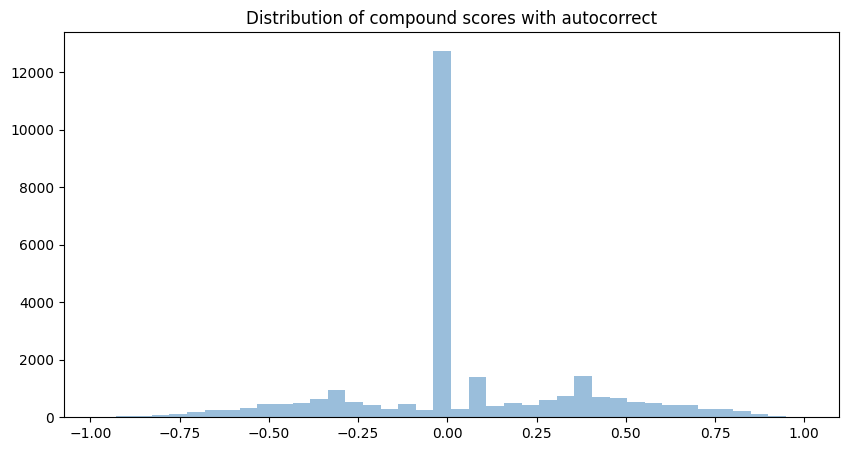

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(df_ac['compound'], bins=40, color=colors[0], alpha=0.5, label='compund score')
plt.title('Distribution of compound scores with autocorrect')
plt.show()

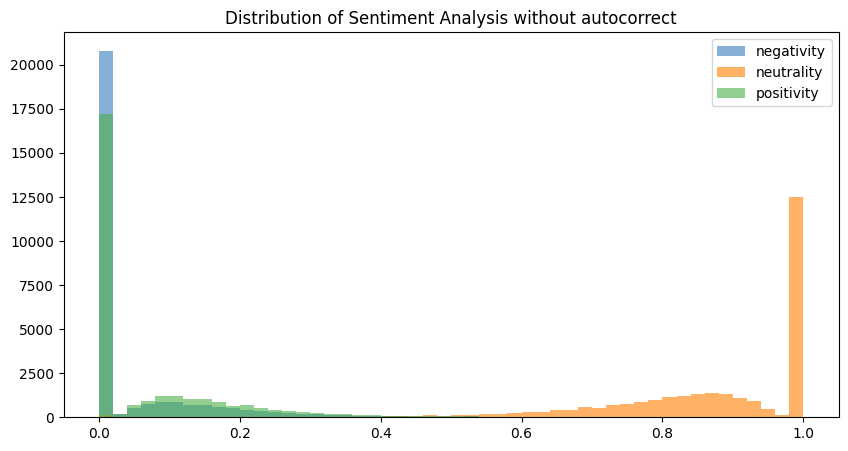

In [9]:
plt.figure(figsize=(10, 5))
plt.hist(df_ac['negativity'], bins=50, alpha=0.6, label='negativity', color=colors[0])
plt.hist(df_ac['neutrality'], bins=50, alpha=0.6, label='neutrality',
         color=colors[1])
plt.hist(df_ac['positivity'], bins=50, alpha=0.6, label='positivity',
         color=colors[2])
plt.legend(loc='upper right')
plt.title('Distribution of Sentiment Analysis with autocorrect')
plt.show()

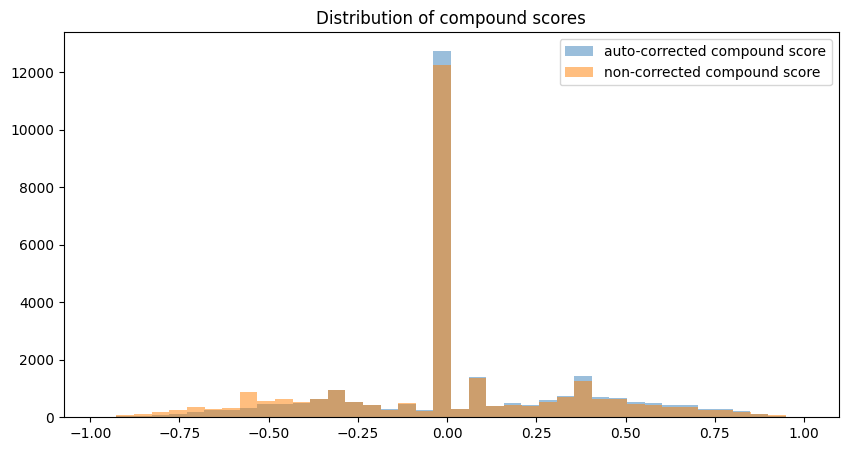

In [42]:
plt.figure(figsize=(10, 5))
plt.hist(df_ac['compound'], bins=40, color=colors[0], alpha=0.5, label='auto-corrected compound score')
plt.hist(df['compound'], bins=40, color=colors[1], alpha=0.5, label='non-corrected compound score')
plt.title('Distribution of compound scores')
plt.legend()
plt.show()

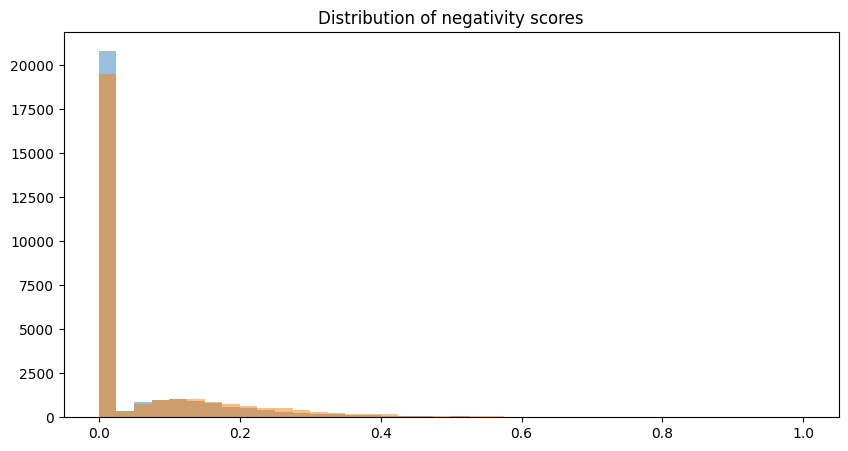

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(df_ac['negativity'], bins=40, color=colors[0], alpha=0.5, label='compund score')
plt.hist(df['negativity'], bins=40, color=colors[1], alpha=0.5, label='compund score')
plt.title('Distribution of negativity scores')
plt.show()

In [39]:
data = df['compound'].describe().to_dict()

data['compound_lt_0'] = df[df['compound'] < 0].shape[0]
data['compound_gt_0'] = df[df['compound'] > 0].shape[0]
data['compound_eq_0'] = df[df['compound'] == 0].shape[0]
data['compound_lt_-_0.2'] = df[df['compound'] < -0.2].shape[0]
data['compound_gt_0.2'] = df[df['compound'] > 0.2].shape[0]

data

{'count': 29096.0,
 'mean': 0.0036007801759692063,
 'std': 0.34622808319040055,
 'min': -0.976,
 '25%': -0.1027,
 '50%': 0.0,
 '75%': 0.1326,
 'max': 0.9979,
 'compound_lt_0': 7895,
 'compound_gt_0': 9055,
 'compound_eq_0': 12146,
 'compound_lt_-_0.2': 6781,
 'compound_gt_0.2': 6879}

In [40]:
data_ac = df_ac['compound'].describe().to_dict()

data_ac['compound_lt_0'] = df_ac[df_ac['compound'] < 0].shape[0]
data_ac['compound_gt_0'] = df_ac[df_ac['compound'] > 0].shape[0]
data_ac['compound_eq_0'] = df_ac[df_ac['compound'] == 0].shape[0]
data_ac['compound_lt_-_0.2'] = df_ac[df_ac['compound'] < -0.2].shape[0]
data_ac['compound_gt_0.2'] = df_ac[df_ac['compound'] > 0.2].shape[0]

data_ac

{'count': 29018.0,
 'mean': 0.05010808808325867,
 'std': 0.3244195950754875,
 'min': -0.976,
 '25%': 0.0,
 '50%': 0.0,
 '75%': 0.2263,
 'max': 0.9974,
 'compound_lt_0': 6392,
 'compound_gt_0': 9999,
 'compound_eq_0': 12627,
 'compound_lt_-_0.2': 5286,
 'compound_gt_0.2': 7729}